In [252]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 12)
import pandas as pd

In [253]:
def imp_sample(func_x, prob_p, prob_q, lims, nparam = [10, 1, 5], M = 100):

    n_vals = [nparam[0]**i for i in range(nparam[1], nparam[2])]
    lim_a, lim_b = lims

    d_res = np.array([])
    i_res = np.array([])

    for n in n_vals:
        for m in range(M):        # Repeating exp. M times
            x_axis = np.linspace(lim_a, lim_b, n)

            '''direct sampling'''
            # xd = np.random.uniform(0, 10, n)
            xd_d = np.array(random.choices(x_axis, prob_p(x_axis), k = n))
            fd_sum = np.sum(func_x(xd_d))
            result_d = fd_sum/n # (lim_b-lim_a)*
            d_res = np.append(d_res, result_d)

            '''importance sampling'''
            xd_i = np.array(random.choices(x_axis, prob_q(x_axis), k = n))
            fi_sum = np.sum(func_x(xd_i)*prob_p(xd_i)/prob_q(xd_i))
            result_i = fi_sum/n
            i_res = np.append(i_res, result_i)

    return d_res, i_res

In [254]:
lim_a = 0
lim_b = 10
lims = [lim_a, lim_b]
M = 100
n_vals = [10**i for i in range(1, 5)]

func_x = lambda x: 10*np.exp(-2*np.abs(x-5))
'''Make sure int of prob densities are equal to 1'''
prob_p = lambda x: 1/(lim_b - lim_a) + 0*x   # constant prob.
# prob_p = lambda x: np.exp(-np.abs(x))/2
prob_q = lambda x: np.exp(-(x-5)**2/2)/np.sqrt(2*np.pi)

d_res, i_res = imp_sample(func_x, prob_p, prob_p, lims)

Text(0.5, 0, 'Result')

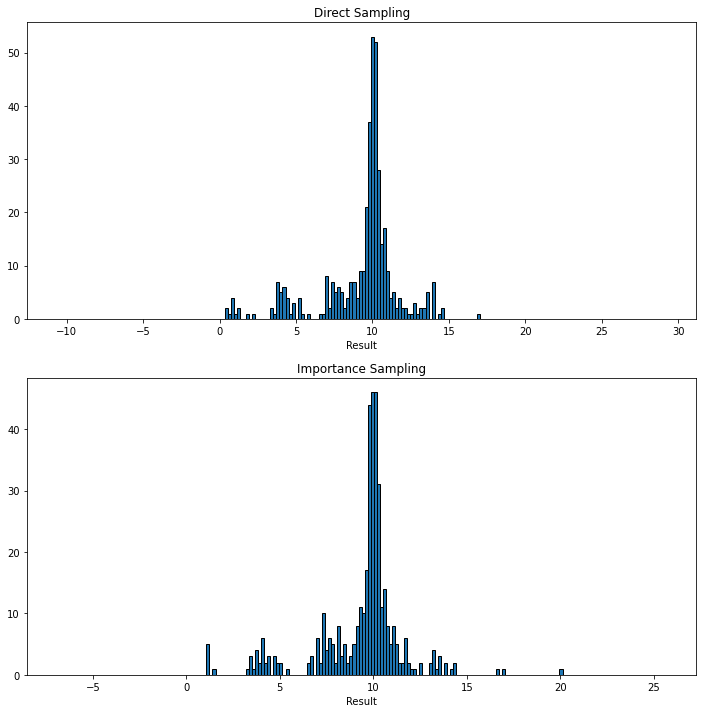

In [255]:
d_mean = [np.mean(d_res[M*i: (i+1)*M]) for i in range(0, len(n_vals))]
d_var = [np.var(d_res[M*i: (i+1)*M]) for i in range(0, len(n_vals))]
i_mean = [np.mean(i_res[M*i: (i+1)*M]) for i in range(0, len(n_vals))]
i_var = [np.var(i_res[M*i: (i+1)*M]) for i in range(0, len(n_vals))]

mean_d_mean = np.mean(d_mean)
sigma_d = np.var(d_res)
mean_i_mean = np.mean(i_mean)
sigma_i = np.var(i_res)

fig, ax = plt.subplots(2, 1)
ax[0].hist(d_res, bins = 200, ec = "black", range = (mean_d_mean - 3*sigma_d, mean_d_mean + 3*sigma_d))
ax[0].set_title("Direct Sampling")
ax[0].set_xlabel("Result")

ax[1].hist(i_res, bins = 200, ec = "black", range = (mean_i_mean - 3*sigma_i, mean_i_mean + 3*sigma_i))
# ax[1].axvline(x = 1.772454, ls = "--", color = "red")
ax[1].set_title("Importance Sampling")
ax[1].set_xlabel("Result")

# plt.show()

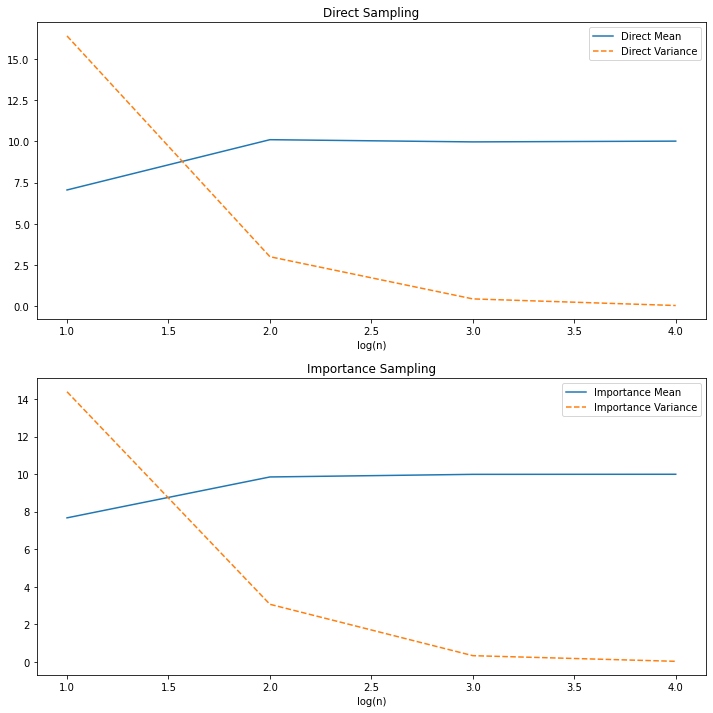

In [256]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(np.log10(n_vals), d_mean, label = "Direct Mean")
axs[0].plot(np.log10(n_vals), d_var, ls = "--", label = "Direct Variance")
axs[0].set_xlabel("log(n)")
axs[0].set_title("Direct Sampling")
axs[0].legend()
axs[1].plot(np.log10(n_vals), i_mean, label = "Importance Mean")
axs[1].plot(np.log10(n_vals), i_var, ls = "--", label = "Importance Variance")
axs[1].set_xlabel("log(n)")
axs[1].set_title("Importance Sampling")
axs[1].legend()

plt.show()

In [257]:
print(d_mean)
print(i_mean)

[7.054442369045695, 10.107201980757697, 9.97325974350872, 10.019411989724718]
[7.671264406007713, 9.848254429452666, 9.986918785520592, 9.991917168333698]


In [258]:
dict = {"n": n_vals, 
        "Direct Variance": d_var, 
        "Indirect Variance": i_var
        }
dt = pd.DataFrame(dict)
print(dt)

       n  Direct Variance  Indirect Variance
0     10        16.404507          14.383160
1    100         3.002456           3.069655
2   1000         0.441289           0.334635
3  10000         0.040225           0.033830
